In [1]:
import numpy as np
from ase.build import bulk
from ase.calculators.emt import EMT
np.random.seed(42)

from ase.io import write

In [2]:
initial = bulk('Cu') * (10,10,10)
symbols = initial.get_chemical_symbols()
vacancy_index = np.random.choice(np.arange(0,len(symbols)), size=int(len(symbols)*0.8), replace=False)
for i in vacancy_index:
    symbols[i] = 'X'
initial.set_chemical_symbols(symbols)
initial.set_calculator(EMT())

# Set tags. >10000 for vacancies, <10000 for Cu atoms
tags = []
cu_tags = []
vac_tags = []
for i, s in enumerate(initial.get_chemical_symbols()):
    if s == 'X':
        tag = i + 10000
        vac_tags.append(tag)
    else:
        tag = i
        cu_tags.append(tag)
    tags.append(tag)
initial.set_tags(tags)

write('example2_initial.traj', initial)
initial

Atoms(symbols='Cu200X800', pbc=True, cell=[[0.0, 18.05, 18.05], [18.05, 0.0, 18.05], [18.05, 18.05, 0.0]], tags=..., calculator=EMT(...))

In [3]:
import sys
sys.path.append('../')
from asetil.monte_carlo.monte_carlo import MonteCarlo
from asetil.site_exchange_mc.semc import SiteExchangeClusterGenerationSampler, SEMCPrintLogger
from asetil.monte_carlo.tag_selector import RandomTagSelector
from asetil.monte_carlo.sampler_selector import RandomSamplerSelector
from asetil.monte_carlo.logger import MCPrintLogger, MCPFileLogger, MCInMemoryLogger

In [4]:
cu_tag_selector = RandomTagSelector(target_tags=cu_tags)
vac_tag_selector = RandomTagSelector(target_tags=vac_tags)
cluster_generation_sampler = SiteExchangeClusterGenerationSampler(tag1_selector=cu_tag_selector, tag2_selector=vac_tag_selector)

sampler_selector = RandomSamplerSelector()
sampler_selector.add_sampler(cluster_generation_sampler, weight=1)

loggers = [
    SEMCPrintLogger(log_interval=100),
    MCPFileLogger(log_interval=100, out_file='example1.log', force_overwrite=True),
    MCInMemoryLogger(log_interval=100)
]
mc = MonteCarlo(temperature=200, max_iter=10000, sampler_selector=sampler_selector, loggers=loggers)
ret = mc.run(initial)
ret.wrap()

initializing loggers
 iteration,    sampler.name, latest_accepted_energy,    delta_e,   acceptability,  is_accepted,                 tags
         0,  SymbolExchange,                    nan,   2.038523,        0.000000,        False,       [(489, 10585)]


KeyboardInterrupt: 

In [ ]:
write('example2_final.traj', ret)

In [ ]:
from ase.visualize import view
view(ret)

<Popen: returncode: None args: ['c:\\Users\\User\\AppData\\Local\\pypoetry\\...>

In [ ]:
symbols = ret.get_chemical_symbols()
tags = ret.get_tags()
for s, t in zip(symbols, tags):
    assert (s == 'X' and t >= 10000) or (s == 'Cu' and t < 10000)

In [ ]:
import pandas as pd
log, columns = loggers[2].get_log(with_columns=True)
df = pd.DataFrame(log, columns=columns)
df

C:\Users\User\AppData\Local\Temp\ipykernel_22352\1455353790.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,iteration,sampler.name,latest_accepted_energy,delta_e,acceptability,is_accepted
0,0,SymbolExchange,NaN,2.038523,4.280227e-52,False
1,10,SymbolExchange,292.141204,0.828558,1.322094e-21,False
2,20,SymbolExchange,288.027325,-0.024986,1.000000e+00,True
3,30,SymbolExchange,282.698345,0.293857,3.936565e-08,False
4,40,SymbolExchange,280.352220,-2.082708,1.000000e+00,True
5,50,SymbolExchange,276.043574,0.961032,6.068157e-25,False
6,60,SymbolExchange,274.344989,0.595515,9.855499e-16,False
7,70,SymbolExchange,269.881389,0.495610,3.244651e-13,False
8,80,SymbolExchange,268.064417,-1.095593,1.000000e+00,True
9,90,SymbolExchange,266.608729,1.161927,5.256734e-30,False


Text(0, 0.5, 'latest accepted energy / eV')

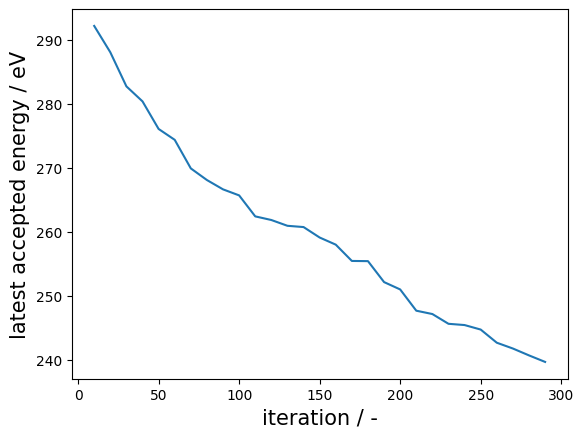

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['iteration'], df['latest_accepted_energy'])
ax.set_xlabel('iteration / -', fontsize=15)
ax.set_ylabel('latest accepted energy / eV', fontsize=15)